5/5 [==============================] - 0s 4ms/step
Время обучения: 71.14 сек
Время предсказания: 0.3055 сек
MSE: 601506.31
MAE: 568.07


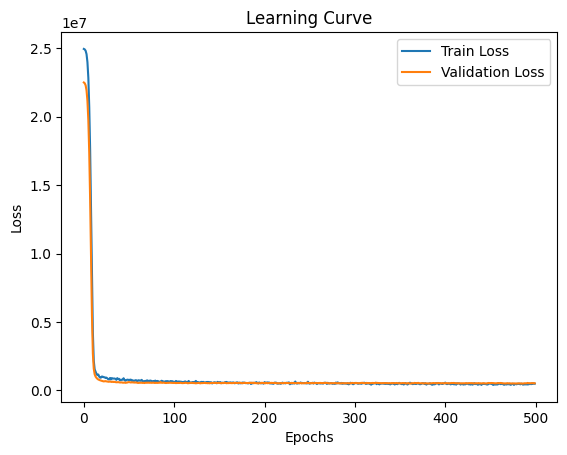

In [10]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1. Загрузка данных
df = pd.read_csv("day.csv")

# 2. Предобработка данных
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df = df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'total_rentals'
})

# 3. Преобразование категориальных признаков
categorical_features = ['season', 'month', 'weekday', 'weather']
df[categorical_features] = df[categorical_features].astype('category')
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 4. Разделение данных
X = df.drop('total_rentals', axis=1).values
y = df['total_rentals'].values

# 5. Масштабирование признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 6. Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Создание модели MLP
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# 8. Компиляция модели
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# 9. Обучение с ранней остановкой
start_time = time.time()
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)
train_time = time.time() - start_time

# 10. Предсказание и оценка
start_pred = time.time()
y_pred = model.predict(X_test)
pred_time = time.time() - start_pred

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 11. Вывод результатов
print(f"Время обучения: {train_time:.2f} сек")
print(f"Время предсказания: {pred_time:.4f} сек")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# 12. Визуализация обучения
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()